<img src = "https://drive.google.com/uc?export=view&id=1sxzZUMO3YZmqYi0xR6vSxG9hZZYrLJIQ" alt = "Encabezado MLDS" width = "100%">  </img>

## **Project Framework**
---

### **Project Background**
---


White blood cells (WBC) play a significant role in the _immune system_ by protecting the body from infectious disease and foreign invaders. Thereby, an ML-assisted identification of WBC from microscopic images is an essential instrument to help **haemotologists** in diagnosing immune-system-related diseases, such as leukemia, AIDS, and certain types of blood cancer. Analysis of WBC structure from microscopic images and classification of cells into types and sub-types is challenging because of the following issues: *i) variations in maturation stages*, *ii) intra-class variation of the cell types due to using distinct acquisition and staining techniques, iii) illumination variations, iv) localization/size change, v) rotation, vi) cell morphology and background, vi) poor image quality*, and *vii) time complexity*.

### **Scope**
---


An automated WBC classification process will be implemented to identify classes and sub-clasess of white cells from microscopic images. In order to perform this image classification, first we will implement an image **pre-processing**, in which an image enhancement by suppressing unwanted distortion, removing noise, and includig some geometric trnasformation (e.g., rotation, scaling, and translation). Following this, a **feature extraction representation** will be applied to extract common features which include: geometrical features, such as, area, radious, perimeter, convex area, major axis length, compactness, and orientation; textural features, such as momentum, contrast, entropy, and skewness; and color features (i.e. color distribution and histogram). Finally, a **transfer learning** and **fine tunning** techniques with pre-trained models will be executed to perform the classification task. In the literature there are a few pre-trained models proposed as suitable candidates to carry out this challenging application, the aim of the present study is to explore the overall performance of a convolutional neural network (CNN) in identifying distinct white blood cell types - and thus, establish a useful diagnosis tool for professionals, by implementing an automated WBC classification that ultimately might be a diagnosis tool, given its utility in associating physiological anomalies identified by the aforementioned classification technique.

# **Understanding and Data Processing**
---



In [ ]:
!pip install gdown

In [ ]:
import gdown
import os

In [ ]:
file_id = "1zomh0RsLehw1S0ndaFJ5cjigHSEGh0rf"
output_path = "/content/image.jpg"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zomh0RsLehw1S0ndaFJ5cjigHSEGh0rf
To: /content/image.jpg
100%|██████████| 171k/171k [00:00<00:00, 44.1MB/s]


'/content/image.jpg'

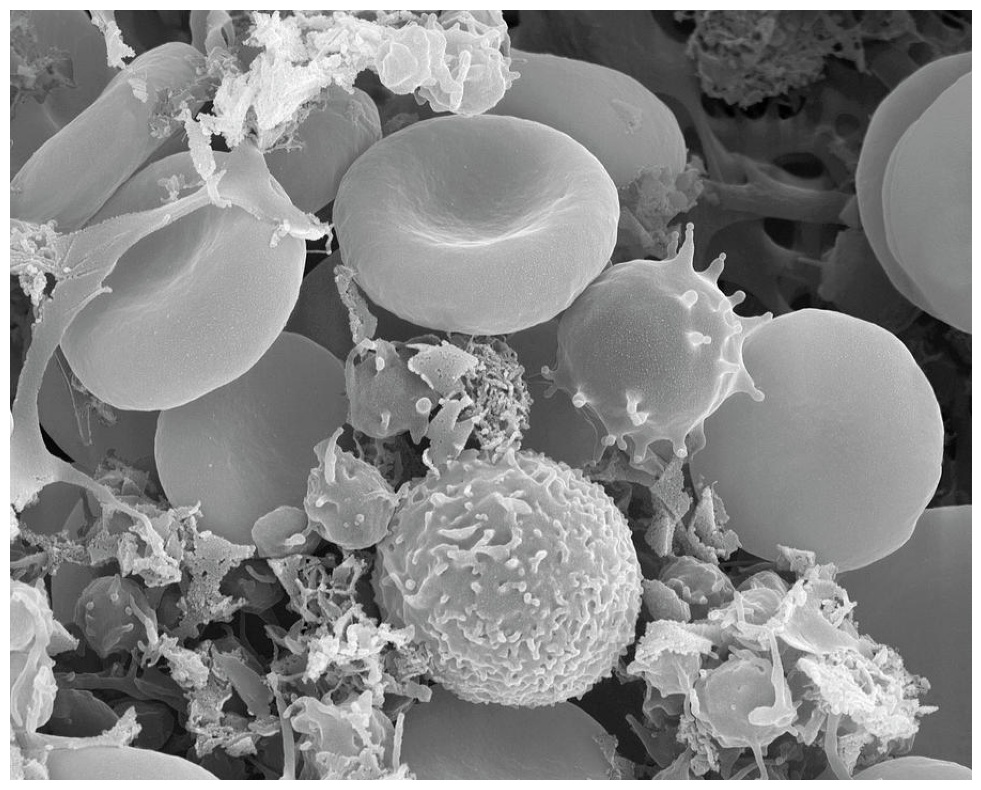

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = Image.open(output_path)


# Display the image
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()

## **1. Exploratory Data Analysis**
---



**Data Loading**

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


As the dataset is already split into *train* and *test*, we load the corresponding folders from Drive:  

In [ ]:
# Define the path and split the data into training and validation split

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data")

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Train")

ds_test_A = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Test-A")

ds_test_B = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Test-B")


Found 16633 files belonging to 3 classes.
Found 10175 files belonging to 5 classes.
Found 4339 files belonging to 5 classes.
Found 2119 files belonging to 2 classes.


**1.1. General Description**
---
As observed above, the dataset contains *16633* images distributed among three distinct folders (Train, Test-A, and Test-B). Each folder has a total of *10175*, *4339*, and *2119* images, respectively; corresponding to the following classes:

1. Basophil
2. Eosinophil
3. Lymphocyte
4. Monocyte
5. Neutrophil

To get a better idea of the main properties of each type of white blood cell, take a brief look at the following table:


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_id =  '1iit06WbfNo_yRFgWqCuwQgW277cnL4DK'
url = f'https://drive.google.com/uc?id={file_id}'
output_file = "WBC_c.xlsx"

gdown.download(url, output_file, quiet = False)

wbc = pd.read_excel(output_file)
display(wbc)

Downloading...
From: https://drive.google.com/uc?id=1iit06WbfNo_yRFgWqCuwQgW277cnL4DK
To: /content/WBC_c.xlsx
100%|██████████| 9.07k/9.07k [00:00<00:00, 7.93MB/s]


,WBCs,% In blood,Nucleus,Cytoplasm,Size (μm)
0,Neutrophils,0.60,It's divided into 2 to 5 segments and stains d...,It's pale pink to tan with pink-purple granules,12–16
1,Eosinophils,0.03,"It has 2 lobes that each stains purple, and is...",It's pale pink-tan but contains large purple/b...,14–16
2,Basophils,0.01,It's divided into 2 to 5 segments and stains d...,It's pale pink to tan with pink-purple granules,14–16
3,Monocytes,0.06,It's singular and is kidney shaped (convoluted...,"It stains a blue-gray color and is ""ground gla...",14–20
4,Lymphocytes,0.30,"It's large, round or oval, and is dark staining","It is not present or very small, and is pale b...",8–15


We define the following function to check out the total size of the images contained within the dataset:

In [ ]:
import os
import os.path

def get_dir_size(dir_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(dir_path):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            if not os.path.islink(file_path):
                total_size += os.path.getsize(file_path)

    return total_size

In [ ]:
# TEST CELL
dir_path = '/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data'
print(f'The size of the dataset is: {get_dir_size(dir_path)*(1e-6):.2f} MB')

The size of the dataset is: 573.62 MB


Likewise, we apply a similar method to obtain the unique file extensions from the images in our directory:

In [ ]:
def unique_file_formats(dir_path):
  unique_formats = set()
  for dirpath, dirnames, filenames in os.walk(dir_path):
    for file in filenames:
      file_name, file_extension = os.path.splitext(file) # We use the os.path.splittext method to get the text format of the files
      if file_extension:
        unique_formats.add(file_extension)
  return unique_formats

In [ ]:
# TEST CELL
dir_path = '/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data'
unique_file_formats(dir_path)


{'.jpg'}

**As observed in the previous result, the unique file format found in the directory was** `.jpg`.

### **1.2. Data Quality Summary and Type of Variables**
---
We are dealing with a preprocessed data, as this dataset belongs to the repository *Kaggle*. Now, we will analyze the labels distribution in the train set of images:


In [ ]:
def label_dist(train_path):
  # Initialize an empty dictionary to store the label counts
  label_counts = {}
  for dirpath, dirnames, filenames in os.walk(train_path):
    label = os.path.basename(dirpath)

    if label == os.path.basename(train_path):
      continue
    # count the number of files in the current subdirectory
    num_files = len(filenames)
    # update the label counts in the dictionary
    label_counts[label] = num_files

  return label_counts


In [ ]:
# TEST CELL
train_path = "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Train"
label_distribution = label_dist(train_path)

# Print label distribution
for label, count in label_distribution.items():
  print(f'{label}: {count} images')

Basophil: 212 images
Eosinophil: 744 images
Monocyte: 561 images
Lymphocyte: 2427 images
Neutrophil: 6231 images


We can observe that the labels are unbalanced within the train directory, which will make us work during the model training stage with a stratify method.

Next, we check the labels fro each set of images, **Train, Test-A, and Test-B**, respectively:

In [ ]:
import tensorflow_datasets as tfds

batch_size = 32
dataset_name = ds_train
class_names = ds_train.class_names

dataset_name_val_A = ds_test_A
class_names_A = ds_test_A.class_names

dataset_name_val_B = ds_test_B
class_names_B = ds_test_B.class_names

print(f'Labels in Train directory: {class_names}')
print(f'Labels in Test-A directory: {class_names_A}')
print(f'Labels in Test-A directory: {class_names_B}')

## **2. Data Preprocessing and Cleaning**
---


### **2.1 Resize images and Standarize Data for a Neural Network:**

First, we create the validation dataset:

In [ ]:
#Create the Validation dataset
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/MLDS - UNAL/Deep Learning (MLDS 5)/Applied Project/Data/WBC_Data/Train",
    validation_split = 0.2,
    subset="validation",
    seed = 123)

Found 10175 files belonging to 5 classes.
Using 2035 files for validation.


In [ ]:
# Resize the images and standarize the data for a neural network
size = (224, 224)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_val = ds_validation.map(lambda image, label: (tf.image.resize(image, size), label))

### **2.2 Image Visualization:**

Finally, we display the ten firs images from the train dataset:

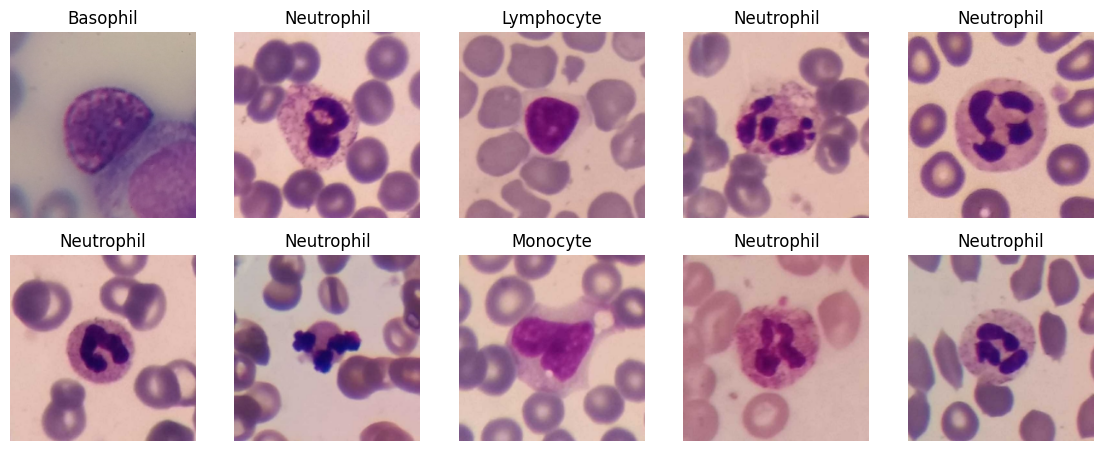

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 14))
for images, labels in ds_train.take(1):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')

#**References**

1. https://www.linkedin.com/pulse/python-calculates-total-size-directory-its-techwith-julles/

2. AL-Dulaimi, K., Banks, J., Chandran, V.,Tomeo-Reyes, I., & Nguyen, K. (2018). Classification of White Blood Cell Types from Microscope Images: Techniques and Challenges, 1–23. Retrieved from https://eprints.qut.edu.au/121783/

3. https://www.kaggle.com/datasets/masoudnickparvar/white-blood-cells-dataset/data

4. https://www.youtube.com/watch?v=CMu25mtyl-s&t=397s

# **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes :**
  * [Santiago Toledo Cortés](https://sites.google.com/unal.edu.co/santiagotoledo-cortes/)
* **Diseño de imágenes:**
    - [Mario Andres Rodriguez Triana](https://www.linkedin.com/in/mario-andres-rodriguez-triana-394806145/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*